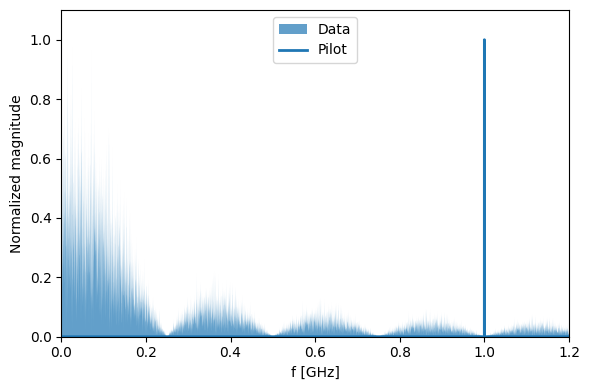

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Rs = 250e6
Ns = 32
Fs = Rs * Ns
Ts = 1 / Fs

Msym = 2048
N = Msym * Ns

f_pilot = 1e9

A_data = 1.0
A_pilot = 10.0   # +20 dB (실제 파워 비는 유지)

t = np.arange(N) * Ts

# QPSK data
sym_idx = np.random.randint(0, 4, Msym)
angles = np.pi/4 + sym_idx * (np.pi/2)
qpsk_symbols = np.exp(1j * angles)
data = A_data * np.repeat(qpsk_symbols, Ns)

# Pilot
pilot = A_pilot * np.exp(1j * 2*np.pi*f_pilot*t)

# FFT
DATA  = np.fft.fft(data)
PILOT = np.fft.fft(pilot)
freq  = np.fft.fftfreq(N, Ts)

pos = freq >= 0
f_pos     = freq[pos]
DATA_pos  = np.abs(DATA[pos])
PILOT_pos = np.abs(PILOT[pos])

# 각각 자기 최대값으로 정규화 (모양 보기 용)
DATA_norm  = DATA_pos  / DATA_pos.max()
PILOT_norm = PILOT_pos / PILOT_pos.max()

f_GHz = f_pos / 1e9

plt.figure(figsize=(6,4))
plt.fill_between(f_GHz, DATA_norm, 0, alpha=0.7, label='Data')
plt.plot(f_GHz, PILOT_norm, linewidth=2, label='Pilot')

plt.xlim(0, 1.2)      # 전체 범위
plt.ylim(0, 1.1)
plt.xlabel('f [GHz]')
plt.ylabel('Normalized magnitude')
plt.legend()
plt.tight_layout()
plt.show()

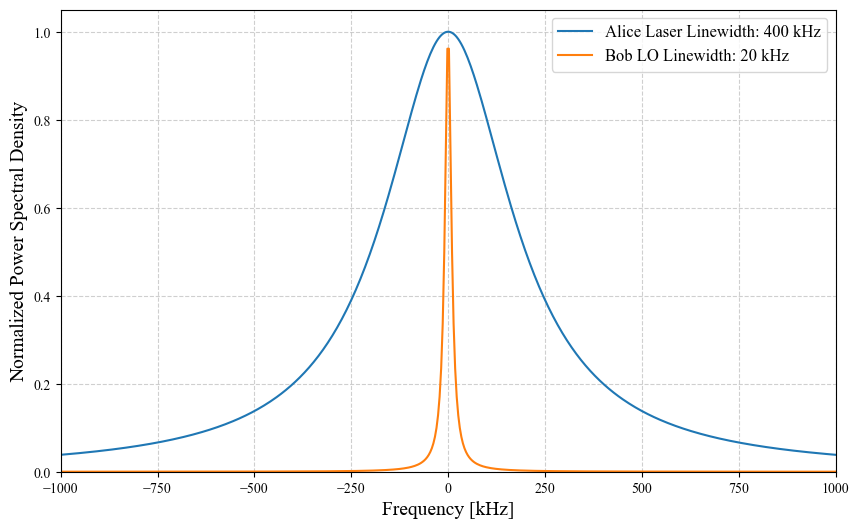

Alice 선폭 (FWHM): 400 kHz
Bob LO 선폭 (FWHM): 20 kHz


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. 파라미터 정의 (선폭은 FWHM 기준) ---
# 레이저 선폭 (Full Width at Half Maximum, FWHM)
linewidth_alice_khz = 400  # Alice (송신부) 선폭: 400 kHz
linewidth_bob_khz = 20     # Bob (LO, 국부 발진기) 선폭: 20 kHz

# kHz를 Hz로 변환
linewidth_alice_hz = linewidth_alice_khz * 1e3
linewidth_bob_hz = linewidth_bob_khz * 1e3

# --- 2. 로렌츠 함수 정의 ---
# Lorentzian Power Spectral Density (PSD)
# P(nu) = P0 * (1 / (1 + (2 * nu / Delta_nu)^2))
# 여기서 Delta_nu는 FWHM (선폭)입니다.
def lorentzian_psd(nu, delta_nu):
    """주파수 nu에서의 정규화된 로렌츠 분포를 계산합니다."""
    # 최대값 P0=1 로 정규화 (nu=0 일 때 P(0)=1)
    return 1 / (1 + (2 * nu / delta_nu)**2)

# --- 3. 주파수 범위 설정 ---
# 플롯을 그릴 주파수 범위 (중심 주파수 0 Hz 기준)
max_freq_khz = 1000  # ±1000 kHz (±1 MHz)까지
num_points = 500
nu_khz = np.linspace(-max_freq_khz, max_freq_khz, num_points)
nu_hz = nu_khz * 1e3

# --- 4. PSD 값 계산 ---
psd_alice = lorentzian_psd(nu_hz, linewidth_alice_hz)
psd_bob = lorentzian_psd(nu_hz, linewidth_bob_hz)

# --- 5. 플롯 생성 ---
plt.figure(figsize=(10, 6))

# Alice의 레이저 스펙트럼 (넓은 선폭)
plt.plot(nu_khz, psd_alice, linestyle='-', label=f'Alice Laser Linewidth: {linewidth_alice_khz} kHz')

# Bob의 LO 레이저 스펙트럼 (좁은 선폭)
plt.plot(nu_khz, psd_bob, linestyle='-', label=f'Bob LO Linewidth: {linewidth_bob_khz} kHz')

# --- 6. 플롯 꾸미기 ---
plt.xlabel('Frequency [kHz]', fontsize=14)
plt.ylabel('Normalized Power Spectral Density', fontsize=14)


plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 1.05) # y축 범위 조정
plt.xlim(-max_freq_khz, max_freq_khz)
plt.show()

print(f"Alice 선폭 (FWHM): {linewidth_alice_khz} kHz")
print(f"Bob LO 선폭 (FWHM): {linewidth_bob_khz} kHz")

--- 1. Practical QKD Case (V_A=0.7 SNU, with Ambiguity Correction) ---

--- Simulation Results: Pol-mux Pilot + Heterodyne (Linewidth Model - SKR Nominal) ---
[CHANNEL] Fiber: 20.0 km @ 0.2 dB/km -> Loss=4.00 dB, T=0.3981
[NOISE]  Elec=0.02 SNU, Nominal xi=0.09 SNU (input)
[NOISE]  MEASURED xi_tot_in (DSP Check) = 13.7605 SNU
[LASER]  Δv_T=400.0 kHz, Δv_LO=20.0 kHz
[DSP]   RMS Phase Error = 0.2270 radians (Target < 0.7854 rad)
[DSP]   Final Ambiguity Correction = 180.00 degrees
--- Performance Metrics ---
[BER]   Final (Ambiguity Corrected)  = 0.37568
[QKD]   SKR (per sym)  = 0.0497 bits/sym (beta = 0.95)
[QKD]   SKR (per sec)  = 12.42 Mb/s

--- 2. High V_A Case (V_A=100 SNU, Ambiguity Test) ---

--- Simulation Results: Pol-mux Pilot + Heterodyne (Linewidth Model - SKR Nominal) ---
[CHANNEL] Fiber: 20.0 km @ 0.2 dB/km -> Loss=4.00 dB, T=0.3981
[NOISE]  Elec=0.02 SNU, Nominal xi=0.09 SNU (input)
[NOISE]  MEASURED xi_tot_in (DSP Check) = 1870.1768 SNU
[LASER]  Δv_T=400.0 kHz, Δv_LO=20.0 

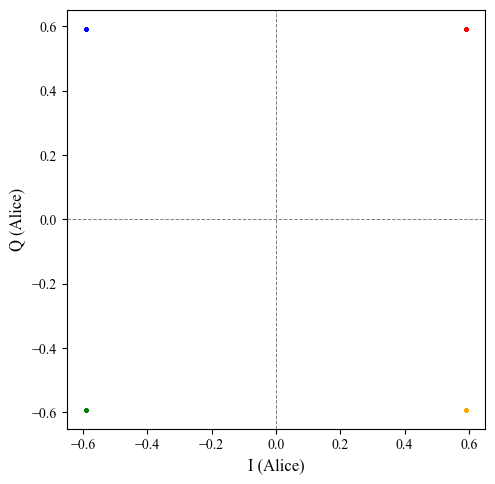

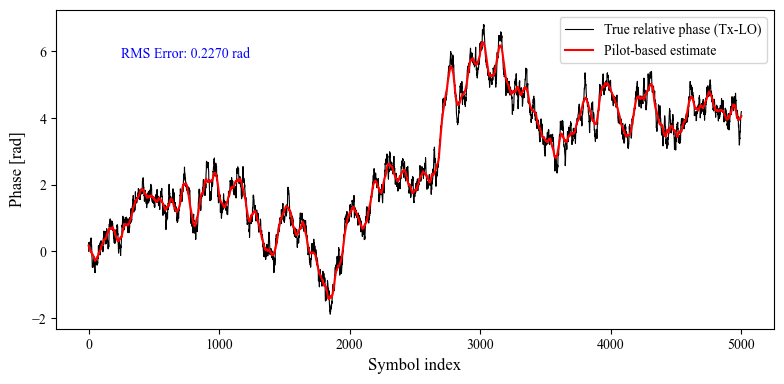

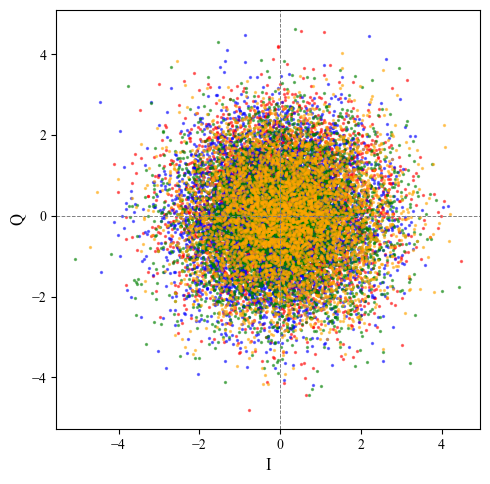

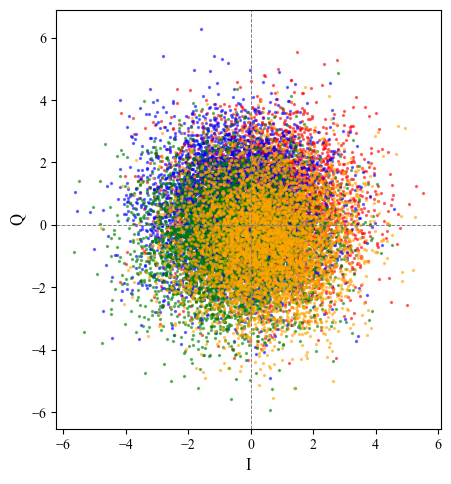

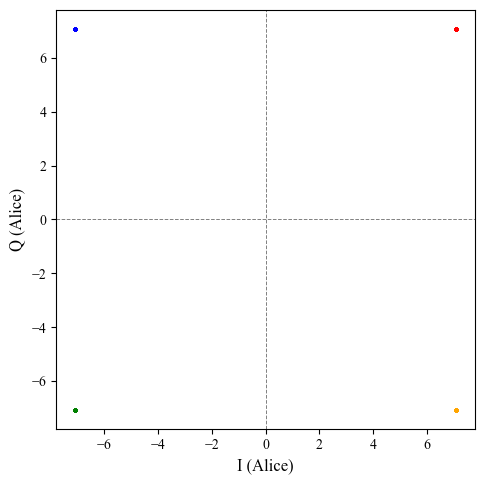

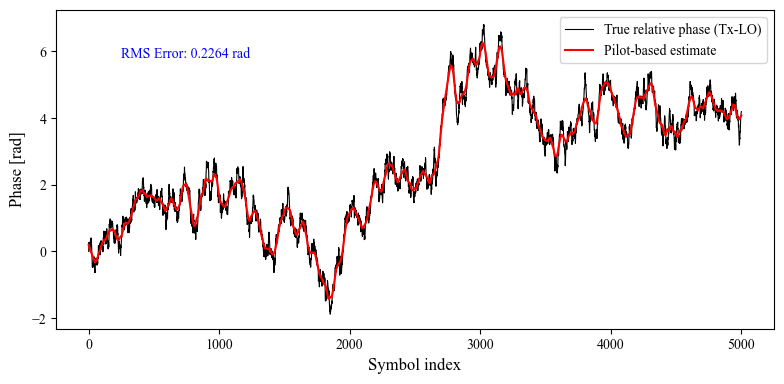

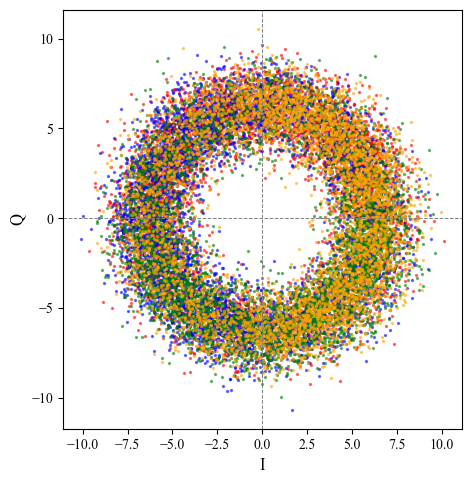

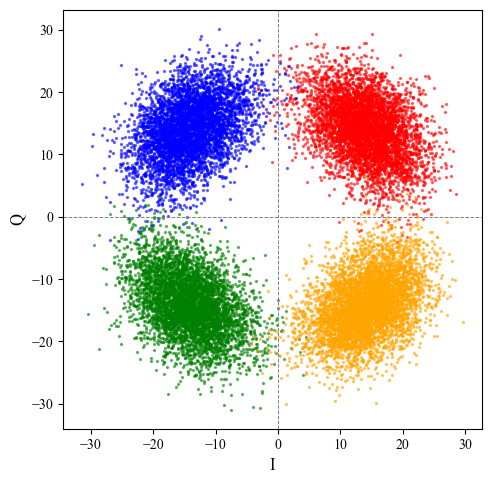

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings

# Matplotlib style settings (Scientific quality & Times New Roman font)
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
rcParams['text.usetex'] = False 
rcParams['font.size'] = 12
rcParams['axes.labelsize'] = 12
rcParams['axes.titlesize'] = 14
rcParams['legend.fontsize'] = 10
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
plt.rcParams.update({'font.size': 12})
# Suppress RuntimeWarning (e.g., log(0) or sqrt(negative))
warnings.filterwarnings("ignore", category=RuntimeWarning) 

# Reconciliation efficiency (for QKD metrics)
BETA_RECONCILIATION = 0.95

# --- Utility Functions ---

def alice_generate_QPSK(N):
    # Generates N QPSK phases (phi) and corresponding indices (0, 1, 2, 3)
    phis = np.array([np.pi/4, 3*np.pi/4, 5*np.pi/4, 7*np.pi/4])
    idx = np.random.randint(0, 4, size=N)
    return phis[idx], idx

def qpsk_ref_points(A):
    # Calculates QPSK reference points (I, Q coordinates) for amplitude A
    K = A/np.sqrt(2)
    return np.array([[+K,+K], [-K,+K], [-K,-K], [+K,-K]])

def qpsk_nn_decision(x, p, A):
    # Nearest neighbor decision for QPSK (Euclidean distance)
    refs = qpsk_ref_points(A)
    d2 = (x[:, None] - refs[None, :, 0])**2 + (p[:, None] - refs[None, :, 1])**2
    return np.argmin(d2, axis=1)

def idx_to_bit(idx):
    # Simple binary mapping (e.g., QPSK indices 0, 1 -> Bit 1; 2, 3 -> Bit 0)
    return ((idx == 0) | (idx == 1)).astype(int)

def moving_average_complex(z, L):
    # Calculates the moving average for a complex array z with length L
    h = np.ones(L, dtype=float)/L
    return np.convolve(z, h, mode='same')

def gen_phase_noise_from_linewidth(N, delta_nu_tx_Hz, delta_nu_lo_Hz, dt, theta0=0.0, seed=None):
    # Generates phase noise using Wiener process (random walk) model
    rng = np.random.default_rng(seed)
    delta_nu_rel = delta_nu_tx_Hz + delta_nu_lo_Hz
    sigma2_step = 2 * np.pi * delta_nu_rel * dt
    sigma_step = np.sqrt(sigma2_step)
    steps = rng.normal(0.0, sigma_step, size=N)
    theta = theta0 + np.cumsum(steps)
    return theta

def apply_fiber(s_mean, T, xi_excess=0.0):
    # Simulates fiber transmission (attenuation T and excess noise)
    s_ch = np.sqrt(T) * s_mean
    return s_ch, (1.0 - T) / 2.0

def heterodyne_optical_mix_to_bb(s_mean_rx, T, xi_excess, elec_noise_SNU,
                                 phi_LO=0.0, f_LO_offset_rad=0.0, seed=None):
    # Heterodyne detection simulation with LO, shot, channel, and electrical noise
    rng = np.random.default_rng(seed)
    N = s_mean_rx.size
    n = np.arange(N)

    # LO mixing rotation (DC/BB conversion)
    rot = np.exp(-1j * (phi_LO + f_LO_offset_rad * n))
    mean_bb = s_mean_rx * rot

    # Noise variance calculation (per quadrature, SNU units)
    V_shot = 0.5
    V_excess_ch = 0.5 * ((1.0 / T) - 1.0) + 0.5 * xi_excess
    V_elec = elec_noise_SNU
    var_meas_quad = V_shot + V_excess_ch + V_elec

    sigma = np.sqrt(var_meas_quad)
    # Add Gaussian noise
    w = rng.normal(0.0, sigma, size=N) + 1j * rng.normal(0.0, sigma, size=N)
    r = mean_bb + w
    return r, var_meas_quad

def dd_affine_calibration(r, A_data):
    # Data-aided (DD) affine compensation (rotation, scaling, offset) using LLS
    x, y = np.real(r), np.imag(r)
    # NN decision to find reference symbols (s_ref)
    idx = (x < 0).astype(int) * 2 + (y < 0).astype(int)
    K = A_data/np.sqrt(2)
    refs_xy = np.array([[+K,+K], [-K,+K], [-K,-K], [+K,-K]])
    s_ref = refs_xy[idx, 0] + 1j*refs_xy[idx, 1]

    N = r.size
    Xr = np.zeros((2*N, 4))
    yr = np.zeros((2*N, 1))
    
    # Setup LLS matrix for [Re(a), Im(a), Re(b), Im(b)]
    Xr[0::2, 0] = np.real(s_ref); Xr[0::2, 1] = -np.imag(s_ref); Xr[0::2, 2] = 1.0; Xr[0::2, 3] = 0.0
    yr[0::2, 0] = np.real(r)

    Xr[1::2, 0] = np.imag(s_ref); Xr[1::2, 1] = np.real(s_ref); Xr[1::2, 2] = 0.0; Xr[1::2, 3] = 1.0
    yr[1::2, 0] = np.imag(r)

    w, *_ = np.linalg.lstsq(Xr, yr, rcond=None)
    a = w[0, 0] + 1j * w[1, 0]
    b = w[2, 0] + 1j * w[3, 0]

    # Apply compensation
    if np.abs(a) > 1e-6:
        r_cal = (r - b) / a
    else:
        r_cal = r.copy()

    return r_cal, a, b, s_ref


def correct_phase_ambiguity(r_cal):
    """
    Applies 90/180/270 degree phase ambiguity correction common in QPSK.
    Finds the rotation that minimizes the error relative to the QPSK axes (0, 90, 180, 270).
    """
    # 1. Calculate the average phase of the received symbols
    avg_phase = np.angle(np.mean(r_cal))

    # 2. Determine the required correction angle (closest to n*pi/2, offset from pi/4 + n*pi/2)
    # The ideal QPSK cluster center is pi/4, 3pi/4, 5pi/4, 7pi/4.
    # We want to rotate the average phase back to the nearest ideal center, 
    # which is equivalent to correcting the rotation ambiguity (0, pi/2, pi, 3pi/2).
    
    # Target center angle (e.g., pi/4)
    target_angle = np.pi/4
    
    # Angle of the current symbols, shifted by the target angle (this aligns them near n*pi/2)
    shifted_angle = avg_phase - target_angle
    
    # Find the nearest multiple of pi/2 (0, pi/2, pi, 3pi/2)
    # N is the nearest integer for rotation ambiguity (0, 1, 2, 3)
    N = np.round(shifted_angle / (np.pi/2))
    
    # Correction angle: The ambiguity rotation that needs to be removed
    correction_angle = np.pi
    
    # Apply the rotation
    r_corr = r_cal * np.exp(-1j * correction_angle)
    
    # Return the corrected complex symbols and the correction angle applied
    return r_corr, correction_angle

def skr_collective_gaussian(V_A, T, xi_excess, eta, nu_el, beta, Fs_sym):
    """ SKR for collective attacks (Gaussian formula) """
    V = V_A + 1.0
    # Detector noise SNU to channel-referred chi_det (for collective attacks)
    chi_det = (1.0 + (1.0 - eta) + 2.0 * nu_el) / eta 
    T_safe = np.maximum(T, 1e-12)

    # Channel-referred noise (excess + loss)
    chi_ch = 1.0 / T_safe - 1.0 + xi_excess
    chi_tot = chi_ch + chi_det / T_safe

    # Mutual Information (I_AB)
    I_AB = np.log2((V + chi_tot) / (1.0 + chi_tot))
    I_AB = np.nan_to_num(I_AB, nan=0.0, posinf=0.0)

    # Entanglement breaking bound (chi_BE) calculation
    A = V**2 * (1.0 - 2.0*T_safe) + 2.0*T_safe + (T_safe**2) * (V + chi_ch)**2
    B = (T_safe**2) * (V * chi_ch + 1.0)**2

    inner1 = np.maximum(A**2 - 4.0*B, 0.0)
    sqrt_inner1 = np.sqrt(inner1)
    # Channel symplectic eigenvalues
    lambda1 = np.sqrt(0.5 * (A + sqrt_inner1))
    lambda2 = np.sqrt(0.5 * (A - sqrt_inner1))

    sqrtB = np.sqrt(B)
    # Effective channel symplectic eigenvalues
    C = (V * sqrtB + T_safe * (V + chi_ch) + A * chi_det) / (T_safe * (V + chi_tot)) 
    D = (sqrtB * (V + sqrtB * chi_det)) / (T_safe * (V + chi_tot))

    inner2 = np.maximum(C**2 - 4.0*D, 0.0)
    sqrt_inner2 = np.sqrt(inner2)
    lambda3 = np.sqrt(0.5 * (C + sqrt_inner2))
    lambda4 = np.sqrt(0.5 * (C - sqrt_inner2))

    def G(x):
        # Entropic function
        x = np.maximum(x, 1e-12)
        return (x + 1.0) * np.log2(x + 1.0) - x * np.log2(x)

    # Entanglement breaking bound
    chi_BE = (
        G((lambda1 - 1.0)/2.0)
        + G((lambda2 - 1.0)/2.0)
        - G((lambda3 - 1.0)/2.0)
        - G((lambda4 - 1.0)/2.0)
    )
    chi_BE = np.nan_to_num(chi_BE, nan=np.inf, posinf=np.inf)

    # Secret Key Rate (SKR) per symbol and per second
    K_per_sym = np.maximum(0.0, beta * I_AB - chi_BE)
    K_per_sec = K_per_sym * Fs_sym

    return {
        "I_AB": I_AB,
        "chi_BE": chi_BE,
        "chi_ch": chi_ch,
        "chi_tot": chi_tot,
        "K_per_sym": K_per_sym,
        "K_per_sec": K_per_sec
    }

# --- Main Pipeline ---

def run_realistic_rx_pipeline_pol(
    N=1_000_000,
    Fs_sym=250e6,
    f_pilot_IF=1e9,
    pilot_to_data_dB=20.0,
    fiber_alpha_dB_per_km=0.2,
    fiber_len_km=20.0,
    n_sig_data=0.7,
    xi_excess=0.05,
    elec_noise_SNU=0.001,
    delta_nu_tx_Hz=400e3,
    delta_nu_lo_Hz=20e3,
    phi_LO=0.0,
    f_LO_offset_rad=0.0,
    pilot_LP_len=51,
    enable_agc=True,
    enable_pilot_tone=True,
    plot_results=True,
    seed=11,
    plots_subset=20000
):
    rng = np.random.default_rng(seed)
    dt_sym = 1.0 / Fs_sym

    # (1) Alice TX: QPSK data & Pilot Signal Generation
    A_data = np.sqrt(n_sig_data)
    phi, true_idx = alice_generate_QPSK(N)
    s_data_tx = A_data * np.exp(1j * phi)

    A_pilot = 0.0
    s_pilot_tx = np.zeros_like(s_data_tx, dtype=complex)
    n_arr = np.arange(N)

    if enable_pilot_tone:
        pilot_power_ratio = 10**(pilot_to_data_dB/10.0)
        A_pilot = np.sqrt(n_sig_data * pilot_power_ratio)
        pilot_phase = 2 * np.pi * (f_pilot_IF / Fs_sym) * n_arr
        s_pilot_tx = A_pilot * np.exp(1j * pilot_phase)

    # (2) Fiber channel (Loss T calculation)
    total_loss_dB = fiber_alpha_dB_per_km * fiber_len_km
    T = 10**(-total_loss_dB / 10.0)
    # Apply fiber loss
    s_data_ch, _ = apply_fiber(s_data_tx, T, xi_excess=xi_excess)
    s_pilot_ch, _ = apply_fiber(s_pilot_tx, T, xi_excess=xi_excess)

    # (3) Laser linewidth-based phase noise (Random Walk)
    theta = gen_phase_noise_from_linewidth(
        N, delta_nu_tx_Hz=delta_nu_tx_Hz, delta_nu_lo_Hz=delta_nu_lo_Hz, dt=dt_sym, seed=seed
    )
    s_data_rx = s_data_ch * np.exp(1j * theta)
    s_pilot_rx = s_pilot_ch * np.exp(1j * theta)

    # (4) Bob optical heterodyne mixing (Noise added)
    r_data_bb, _ = heterodyne_optical_mix_to_bb(s_data_rx, T, xi_excess, elec_noise_SNU,
                                                 phi_LO=phi_LO, f_LO_offset_rad=f_LO_offset_rad, seed=rng.integers(1e9))
    r_pilot_bb, _ = heterodyne_optical_mix_to_bb(s_pilot_rx, T, xi_excess, elec_noise_SNU,
                                                 phi_LO=phi_LO, f_LO_offset_rad=f_LO_offset_rad, seed=rng.integers(1e9))

    # (5) Pilot DSP (DDC + LPF) → theta_hat
    theta_hat = np.zeros(N)
    rms_phase_error = 0.0
    
    # True relative phase drift (Used for RMS calculation and plotting)
    eff_phase = theta - (phi_LO + f_LO_offset_rad * n_arr) 

    if enable_pilot_tone and A_pilot > 0:
        # NCO for Digital Down-Conversion (DDC)
        pilot_nco = np.exp(-1j * 2*np.pi * (f_pilot_IF / Fs_sym) * n_arr)
        r_pilot_bb_ddc = r_pilot_bb * pilot_nco
        # LPF
        r_pilot_lp = moving_average_complex(r_pilot_bb_ddc, pilot_LP_len)
        
        # Phase estimate (Unwrap to avoid wraps)
        theta_hat = np.unwrap(np.angle(r_pilot_lp)) 
        
        # --- RMS Error Calculation ---
        K_rms = min(5000, N) # Use the first K symbols for reporting, consistent with the plot
        estimated_phase_unwrapped = np.unwrap(theta_hat)
        
        # Calculate Phase Error (True relative phase - Estimated phase)
        phase_error = eff_phase[:K_rms] - estimated_phase_unwrapped[:K_rms]
        
        # Calculate RMS (Root Mean Square) Phase Error
        rms_phase_error = np.sqrt(np.mean(phase_error**2))


    # (6) Digital phase correction on data arm only
    r_corr = r_data_bb * np.exp(-1j * theta_hat)

    # (7) Decision + DD affine calibration + AGC
    # Pre-correction BER check (DSP diagnosis)
    det_idx_bef = qpsk_nn_decision(np.real(r_data_bb), np.imag(r_data_bb), A_data)
    a_bits = idx_to_bit(true_idx)
    ber_bef = np.mean(a_bits != idx_to_bit(det_idx_bef))
    
    # DD Affine Calibration
    r_cal, a_hat, b_hat, s_ref = dd_affine_calibration(r_corr, A_data)

    # AGC (Optional)
    if enable_agc:
        med = np.median(np.abs(r_cal))
        if med > 1e-6:
            r_cal = r_cal * (A_data / med)
            # Re-calibrate after AGC
            r_cal, a_hat, b_hat, s_ref = dd_affine_calibration(r_cal, A_data)
        else: r_cal = np.zeros_like(r_cal)

    # --- ADDED STEP: QPSK Phase Ambiguity Correction ---
    # Apply global 90/180/270 degree rotation to align constellation to QPSK axes
    r_cal_final, corr_angle = correct_phase_ambiguity(r_cal)
    
    # Final decision and BER calculation
    det_idx_final = qpsk_nn_decision(np.real(r_cal_final), np.imag(r_cal_final), A_data)
    ber_final = np.mean(a_bits != idx_to_bit(det_idx_final))

    # (8) Excess noise estimate from simulation (for DSP diagnosis only)
    # Use r_cal_final for error vector
    error_vector = r_cal_final - s_ref
    V_err = np.mean(np.abs(error_vector)**2)
    # Total excess noise referred to TX (V_err = T * V_A + 1 + T * xi_tot_meas)
    xi_tot_meas = (V_err - 1.0) / T 

    # (9) QKD metrics (Use NOMINAL xi_excess for stable SKR calculation)
    xi_excess_SKR = xi_excess
    
    # QKD Metric Calculation
    skr_res = skr_collective_gaussian(
        V_A=n_sig_data, T=T, xi_excess=xi_excess_SKR, 
        eta=0.6, nu_el=elec_noise_SNU, beta=BETA_RECONCILIATION, Fs_sym=Fs_sym
    )

    # (10) Logs
    sim_name = "Pol-mux Pilot + Heterodyne (Linewidth Model - SKR Nominal)"
    qpsk_max_dev = np.pi / 4
    
    print(f"\n--- Simulation Results: {sim_name} ---")
    print(f"[CHANNEL] Fiber: {fiber_len_km} km @ 0.2 dB/km -> Loss={total_loss_dB:.2f} dB, T={T:.4f}")
    print(f"[NOISE]  Elec={elec_noise_SNU} SNU, Nominal xi={xi_excess} SNU (input)")
    print(f"[NOISE]  MEASURED xi_tot_in (DSP Check) = {xi_tot_meas:.4f} SNU")
    print(f"[LASER]  Δv_T={delta_nu_tx_Hz/1e3:.1f} kHz, Δv_LO={delta_nu_lo_Hz/1e3:.1f} kHz")
    if enable_pilot_tone and A_pilot > 0:
        print(f"[DSP]   RMS Phase Error = {rms_phase_error:.4f} radians (Target < {qpsk_max_dev:.4f} rad)")
    print(f"[DSP]   Final Ambiguity Correction = {np.degrees(corr_angle):.2f} degrees")
    print("--- Performance Metrics ---")
    print(f"[BER]   Final (Ambiguity Corrected)  = {ber_final:.5f}")
    print(f"[QKD]   SKR (per sym)  = {skr_res['K_per_sym']:.4f} bits/sym (beta = {BETA_RECONCILIATION})")
    print(f"[QKD]   SKR (per sec)  = {skr_res['K_per_sec']/1e6:.2f} Mb/s")


    # (11) Plots (Original DSP diagnostic plots)
    if plot_results:
        colors = {0: 'r', 1: 'b', 2: 'g', 3: 'orange'}
        markers = {0: '.', 1: '.', 2: '.', 3: '.'}
        M = min(plots_subset, N)
        # Use first M samples for deterministic plotting of time-domain signals
        sel = np.arange(M)
        
        # --- (A) Alice QPSK constellation (data only) ---
        plt.figure(figsize=(6, 5))
        plt.gca().set_aspect('equal', adjustable='box')
        for k, deg in zip(range(4), [45, 135, 225, 315]):
            idxk = np.where(true_idx[sel] == k)[0]
            plt.scatter(np.real(s_data_tx)[idxk], np.imag(s_data_tx)[idxk],
                        c=colors[k], marker=markers[k], s=8, alpha=0.6, label=f'{deg}°')
        plt.axvline(0, lw=0.7, color='gray', ls='--'); plt.axhline(0, lw=0.7, color='gray', ls='--')
        plt.xlabel("I (Alice)"); plt.ylabel("Q (Alice)")
        #plt.title("A: Alice QPSK Constellation (Data)")
        # plt.legend(loc='lower left', fontsize=10)
        plt.tight_layout()
        plt.savefig('plot_a_alice_qpsk.png')

        # --- (B) Phase drift vs pilot-based estimate ---
        if enable_pilot_tone and A_pilot > 0:
            K = min(5000, N)
            # eff_phase is already calculated globally
            plt.figure(figsize=(8, 4))
            plt.plot(np.arange(K), eff_phase[:K], color='black', label="True relative phase (Tx-LO)", linewidth=0.8)
            plt.plot(np.arange(K), np.unwrap(theta_hat)[:K], color='r', label="Pilot-based estimate")
            plt.xlabel("Symbol index"); plt.ylabel("Phase [rad]")
            
            # Add RMS value to the plot
            plt.text(K * 0.05, np.max(eff_phase[:K]) * 0.9, 
                    f"RMS Error: {rms_phase_error:.4f} rad", 
                    fontsize=10, color='blue', verticalalignment='top')
                    
            plt.legend()
            plt.tight_layout()
            plt.savefig('plot_b_phase_drift.png')

        # --- (C) Bob data BEFORE correction (Raw) ---
        plt.figure(figsize=(6, 5))
        plt.gca().set_aspect('equal', adjustable='box')
        for k, deg in zip(range(4), [45, 135, 225, 315]):
            idxk = np.where(true_idx[sel] == k)[0]
            plt.scatter(np.real(r_data_bb)[idxk], np.imag(r_data_bb)[idxk],
                        c=colors[k], marker=markers[k], s=8, alpha=0.5, label=f'{deg}°')
        plt.axvline(0, lw=0.7, color='gray', ls='--'); plt.axhline(0, lw=0.7, color='gray', ls='--')
        plt.xlabel("I"); plt.ylabel("Q")
        #plt.title(f"C: Bob data BEFORE correction (BER: {ber_bef:.4f})")
        #plt.legend(loc='lower left', fontsize=10)
        plt.tight_layout()
        plt.savefig('plot_c_bob_before.png')

        # --- (D) Bob FINAL after all DSP (Ambiguity Corrected) ---
        plt.figure(figsize=(6, 5))
        plt.gca().set_aspect('equal', adjustable='box')
        for k, deg in zip(range(4), [45, 135, 225, 315]):
            idxk = np.where(true_idx[sel] == k)[0]
            plt.scatter(np.real(r_cal_final)[idxk], np.imag(r_cal_final)[idxk],
                        c=colors[k], marker=markers[k], s=8, alpha=0.5, label=f'{deg}°')
        # plt.scatter(np.real(s_ref[:M]), np.imag(s_ref[:M]),
        #             c='k', marker='+', s=50, label='Refs')
        plt.axvline(0, lw=0.7, color='gray', ls='--'); plt.axhline(0, lw=0.7, color='gray', ls='--')
        plt.xlabel("I"); plt.ylabel("Q")
        #plt.title(
        #    f"D: Bob FINAL (BER: {ber_final:.4f} | xi_meas={xi_tot_meas:.3f} SNU | SKR={skr_res['K_per_sym']:.4f} bits/sym)"
        #)
        #plt.legend(loc='lower left', fontsize=10)
        plt.tight_layout()
        plt.savefig('plot_d_bob_final.png')

    return {
        "fiber_len_km": fiber_len_km, "T": T, "xi_excess": xi_excess_SKR,
        "I_AB": skr_res['I_AB'], "chi_BE": skr_res['chi_BE'], 
        "chi_ch": skr_res['chi_ch'], "chi_tot": skr_res['chi_tot'],
        "SKR_per_sym": skr_res['K_per_sym'], "SKR_per_sec": skr_res['K_per_sec']
    }


## ----------------------------------------------------------------
## QKD Metrics vs. Distance Plot Function (Added Feature)
## ----------------------------------------------------------------

def plot_qkd_metrics_vs_distance(
    L_range=np.linspace(1, 100, 50),
    V_A=2.0,
    xi_excess=0.05,
    eta=0.6,
    nu_el=0.001,
    alpha_dB_per_km=0.2,
    Fs_sym=100e6,
    beta=BETA_RECONCILIATION
):
    """
    Calculates and plots QKD metrics (I_AB, chi_BE, K) versus various distances.
    """
    
    results = {
        "L_km": [], "T": [], "I_AB": [], "chi_BE": [], "chi_ch": [], "chi_tot": [], "K_per_sec_Mb": []
    }

    for L in L_range:
        total_loss_dB = alpha_dB_per_km * L
        T = 10**(-total_loss_dB / 10.0)
        
        # Stop calculation if transmission is too low
        if T < 1e-6: 
            break
            
        skr_res = skr_collective_gaussian(
            V_A=V_A, T=T, xi_excess=xi_excess, 
            eta=eta, nu_el=nu_el, beta=beta, Fs_sym=Fs_sym
        )
        
        results["L_km"].append(L)
        results["T"].append(T)
        results["I_AB"].append(skr_res['I_AB'])
        results["chi_BE"].append(skr_res['chi_BE'])
        results["chi_ch"].append(skr_res['chi_ch'])
        results["chi_tot"].append(skr_res['chi_tot'])
        results["K_per_sec_Mb"].append(skr_res['K_per_sec'] / 1e6) 

    L_plot = np.array(results["L_km"])


# --- RUN BLOCK (Original test cases) ---
if __name__ == "__main__":
    # --- 1. Practical QKD Case (V_A=0.7 SNU, BER check) ---
    print("--- 1. Practical QKD Case (V_A=0.7 SNU, with Ambiguity Correction) ---")
    metrics_pol_1 = run_realistic_rx_pipeline_pol(
        N=500_000,
        Fs_sym=250e6,
        fiber_len_km=20.0,
        n_sig_data=0.7,
        xi_excess=0.09,
        elec_noise_SNU=0.02,
        plot_results=True 
    )

    # --- 2. High V_A Case (Constellation Check & Ambiguity Test) ---
    print("\n--- 2. High V_A Case (V_A=100 SNU, Ambiguity Test) ---")
    metrics_pol_2 = run_realistic_rx_pipeline_pol(
        N=500_000,
        Fs_sym=250e6,
        fiber_len_km=20.0,
        n_sig_data=100.0,
        xi_excess=0.09,
        elec_noise_SNU=0.02,
        plot_results=True 
    )

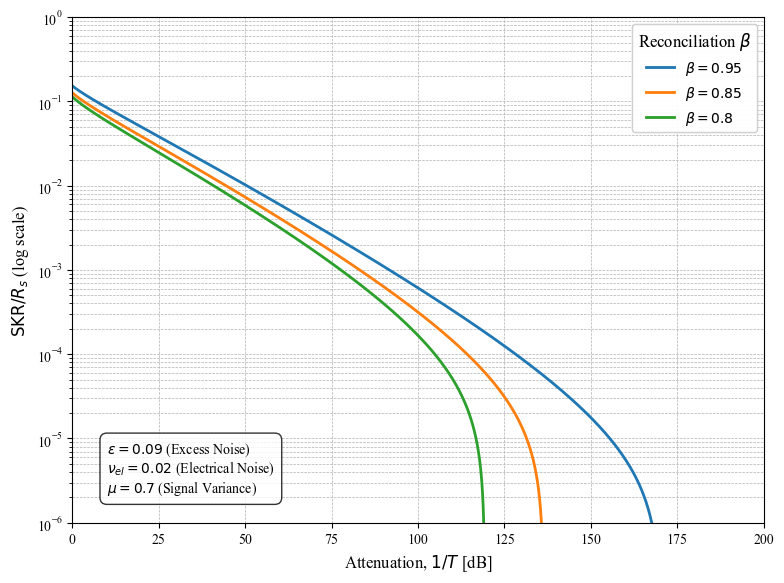

In [11]:
# --- Plot Generation Function ---

def generate_skr_attenuation_plot():
    # Fixed system parameters (from user's simulation defaults)
    V_A = 0.7        # Signal variance ($\mu$)
    xi_excess = 0.09   # Excess noise ($\epsilon$)
    nu_el = 0.02       # Electrical noise ($\nu_{el}$)
    eta = 0.6          # Detector efficiency
    Fs_sym = 250e6     # Symbol rate

    # Reconciliation efficiencies to plot
    beta_rates = [0.95, 0.85, 0.8]
    
    # Attenuation range (x-axis)
    distance_km = np.linspace(0.0, 400.0, 4000)
    attenuation_dB = 0.2 * distance_km #거리 별 감쇠계수 0.2dB/km

    T = 10**(-attenuation_dB / 10.0)

    plt.figure(figsize=(8, 6))

    # Calculate and plot SKR/Rs for each beta rate
    for beta in beta_rates:
        skr_results = skr_collective_gaussian(
            V_A=V_A, T=T, xi_excess=xi_excess, 
            eta=eta, nu_el=nu_el, beta=beta, Fs_sym=Fs_sym
        )
        skr_per_sym = skr_results['K_per_sym']
        
        # Y-axis is log scale
        plt.semilogy(distance_km, skr_per_sym, label=r'$\beta=' + f'{beta}$', linewidth=2)
        
    # --- Plot Customization ---
    
    # Labels
    plt.xlabel(r'Attenuation, $1/T$ [dB]') 
    plt.ylabel(r'$\mathrm{SKR}/R_s$ (log scale)') 
    
    # Grid
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    
    # Upper Right Legend: beta rate
    legend1 = plt.legend(
        loc='upper right', 
        title=r'Reconciliation $\beta$', 
        fontsize=10
    )
    plt.gca().add_artist(legend1)
    
    # Lower Left Legend: epsilon, v_el, mu (as text box)
    legend_text = (
        r'$\epsilon = ' + f'{xi_excess}$ (Excess Noise)\n'
        r'$\nu_{el} = ' + f'{nu_el}$ (Electrical Noise)\n'
        r'$\mu = ' + f'{V_A}$ (Signal Variance)'
    )
    
    plt.text(
        0.05, 0.05, 
        legend_text, 
        transform=plt.gca().transAxes,
        fontsize=10, 
        verticalalignment='bottom', 
        bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8)
    )
    
    # Set y-limits
    plt.ylim(ymin=1e-6, ymax=1e0)
    plt.xlim(xmin=0, xmax=200)
    
    # Save the plot
    plt.tight_layout()
    plt.savefig('skr_vs_attenuation.png')

# --- Execution ---
if __name__ == "__main__":
    generate_skr_attenuation_plot()